# Legge dei grandi numeri e probabilità frequentista

## Legge dei grandi numeri

La legge dei grandi numeri è facile da intuire e ancora più facile da comprendere con simulazioni al calcolatore. Di seguito la dimostreremo con un esempio.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

La legge dei grandi numeri stabilisce una proprietà della media di una sequenza di numeri casuali. La media di una sequenza molto grande di numeri casuali "tende" ad un valore fisso, che non è più casuale, al crescere della dimensione della sequenza.

Simuliamo l'estrazione di un dado con 6 facce con la funzione ```random.randint(1,6)```

In [2]:
r = random.randint(1,6)
print(r)

3


Generiamo un numero alto di lanci

In [3]:
n = 10000
d1 = np.array([random.randint(1,6) for i in range(n)])
d2 = np.array([random.randint(1,6) for i in range(n)])

In [4]:
#print(list(d1))

Definiamo la *media* di $k$ lanci come:

$\bar{x}_k = \frac{\displaystyle 1}{\displaystyle k} {\displaystyle \sum_{i=1}^k x_i}$

Calcoliamo la *media* dei primi $k$ lanci per ogni $k\le n$. A scopo dimostrativo, genereremo due sequenze casuali diverse.

In [5]:
avg1 = [d1[:i+1].mean() for i in range(n)]
avg2 = [d2[:i+1].mean() for i in range(n)]

Mostriamo in un grafico come cambia $\bar{x}$ al variare di $k$.

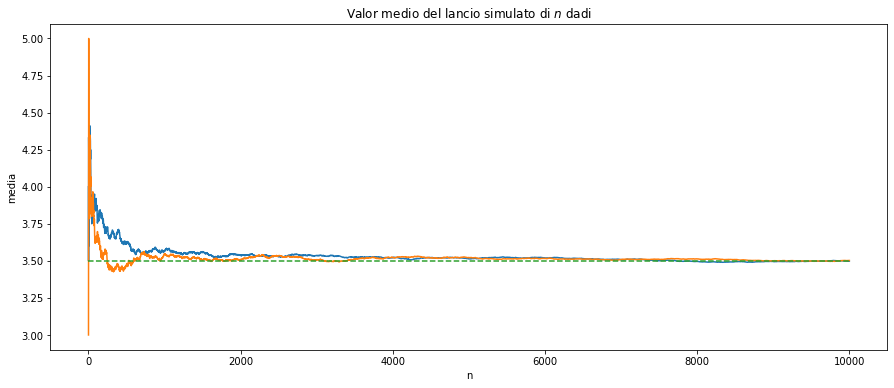

In [6]:
plt.figure(figsize=(15,6))
x = list(range(n))
plt.plot(x,avg1)
plt.plot(x,avg2)
plt.plot([0,n],[3.5,3.5], linestyle='--')
plt.title('Valor medio del lancio simulato di $n$ dadi')
plt.xlabel('n')
plt.ylabel('media')
plt.show()

Avevamo già dimostrato che la varianza di $\bar{x}_k$ è pari a $\sigma^2/k$, dove $\sigma^2$ è la varianza di tutti gli $x_i$. Ci aspettiamo quindi una *dispersione* della distribuzione di $\bar{x}_k$ sempre minore, man mano che $k$ aumenta.

Aumentando il numero di conteggi $n$ è evidente dal grafico che la frequenza, al cerscere di $n$, si avvicina al *valore atteso* di $x$ dalla definizione di probabilità classica:

$\displaystyle \mathbb{E}[x] =\sum_{x=1}^6 x\, P(x) = \sum_{x=1}^6 x\cdot\frac{1}{6} = \frac{1+\cdots +6}{6}=3.5$

In [7]:
np.array(range(1,7)).mean()

3.5

La legge dei grandi numeri si può considerare come legge empirica valida per le osservazioni di esperimenti ripetibili e viene usata alla base della formulazione della probabilità intesa in senso *frequentista*.

La formulazione matematica della legge dei grandi numeri può essere fatta come segue.

$\displaystyle \forall\varepsilon\,\,\,\,\lim_{k\rightarrow\infty}P(|\bar{x}_k-\mathbb{E}[x]|<\varepsilon) = 1$

Ossia, la media del campione di dimensione $k$ *converge in probabilità* al valore atteso $\mathbb{E}[{x}]$. 

Nel caso del lancio dei dadi, questa proprietà può essere provata matematicamente sulla base del calcolo combinatorio, considerando tutti i possibili esiti dei $k$ lanci.

Più in generale, però, dobbiamo ancora definire il significato di *probabilità* per questi casi, e lo faremo con l'approccio frequentista, che però assume che la legge dei grandi numeri sia valida, con un problema di dipendenza "circolare" del ragionamento.

## Probabilità frequentista

In base alla legge dei grandi numeri, la probabilità frequentista è più facile da comprendere con simulazioni al calcolatore.

La probabilità frequentista è definita come limite della frequenza di un evento al tendere del numero di osservazioni all'infinito. Il limite è chiaramente inteso solo in senso ideale e ha difficoltà concettuali ad essere definito matematicamente in modo rigoroso. La "dimostrazione" con il calcolatore, più che con dispositivi fisici, inevitabilmente più lenti, esemplifica cosa si intende più facilmente di ogni tentativo di dimostrazione matematica.

Simuliamo l'estrazione di un dado con 6 facce con la funzione ```random.randint(1,6)```

In [8]:
r = random.randint(1,6)
print(r)

2


Generiamo un numero alto di lanci

In [9]:
n = 100000
d = np.empty(n)
for i in range(n): d[i] = random.randint(1,6)
#print(d)

Calcoliamo la probabilità di ciascun risultato da 1 a 6

In [10]:
count = np.empty(6)
for i in range(6): count[i] = len(np.where(d==i+1)[0])
freq = count/n
print("Conteggi: ", count)
print("Frequenza:", freq)

Conteggi:  [16779. 16704. 16645. 16461. 16477. 16934.]
Frequenza: [0.16779 0.16704 0.16645 0.16461 0.16477 0.16934]


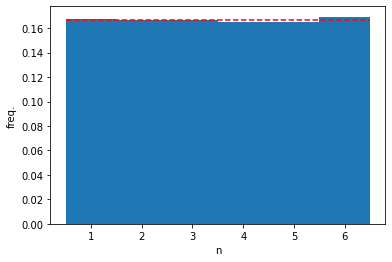

In [11]:
plt.figure()
x=np.arange(1,7)
plt.bar(x, freq, 1)
plt.plot([0.5, 6.5], [1/6, 1/6], color='red',linestyle='--')
plt.xlabel('n')
plt.ylabel('freq.')
plt.show()

Aumentando il numero di conteggi $n$ è evidente che la frequenza, al cerscere di $n$, si avvicina al valore atteso dalla definizione di probabilità classica, $p = 1/6$. Il limite esatto non è reggiungible in realtà, se non attendendo un tempo infinito.

In sostanza, la probabilità frequentista definisce come probabilità il limite per $n\rightarrow\infty$ della frequenza, in analogia a quanto si può dimostrare nei casi trattabili attraverso la probabilità classica.

Ci piacerebbe definire:

$\displaystyle P(x) = \lim_{n\rightarrow\infty} \frac{N_n(x)}{n}$

Tuttavia, non c'è alcuna garanzia che la successione converga. Nulla impedisce, infatti, di osservare una sequenza arbitrariamente lunga di $6,6,6,6,\cdots$. Semplicemente, ripetendo tante volte l'esperimento, quest accadrà *molto di rado*. Ma possiamo affermare che ciò è *improbabile* solo dopo aver definito cosa significa probabilità, e noi stiamo in qualche modo usando il concetto di probabilità *prima* di definirlo.

La definizione della probabilità frequentista è:

$\displaystyle P(E) = p\,\,\,\mathrm{se}\,\,\, \forall\varepsilon\,\,\,\lim_{n\rightarrow\infty}
P\left(
\left|\frac{N_n(E)}{n}-p\,
\right|<\varepsilon
\right)=1$

La principale difficoltà è che, nella realtà, il limite per $n\rightarrow\infty$ non è realizzabile. Inoltre, il passaggio al limite in probabilità, per definire a sua volta una probabilità, presenza delle inconsistenze logiche, come abbiamo già notato sopra.

Tuttavia, i fisici, più degli statistici, spesso usano questo concetto in maniera pragmatica, senza troppa attenzione alle inconsistenze concettuali di questa definizione.

"*this definition is not very appealing to a mathematician, since it is based on experimentation, and, in fact, implies unrealizable experiments*"

Eadie, W., Drijard, D., James, F., Roos, M., Saudolet, B.: Statistical Methods in Experimental Physics. North Holland, Amsterdam (1971)

## Successione logistica

Rivediamo l'esempio della successione logistica per $r=4$ alla luce della legge dei grandi numeri e forniamo un'interpretazione frequentista della relativa probabilità.

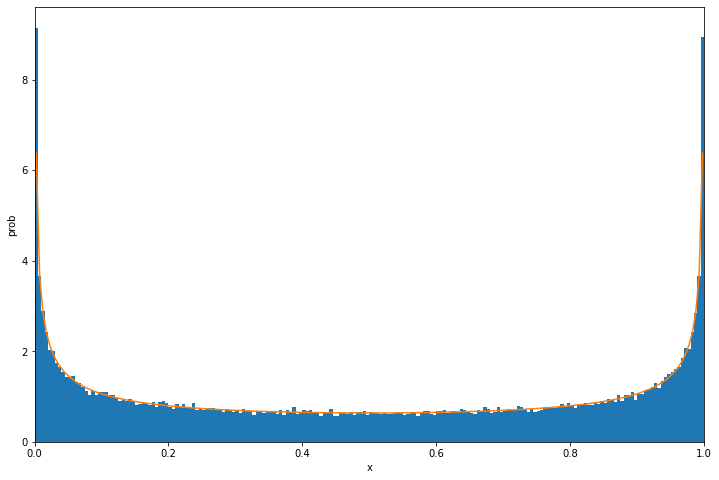

In [16]:
seq=[]
r=4
x = 0.34567
for i in range(100000):
    seq.append(x)
    x=r*x*(1-x)
nbins=200
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(seq, nbins, density=True)
delta=1/nbins
x = np.linspace(0+delta/2,1-delta/2,nbins)
y = c = 1./np.sqrt(x*(1-x))
y/=math.pi
plt.plot(x, y)
plt.xlim(0, 1)
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

# Campi di applicazione

L'approccio frequentista si può applicare unicamente ai casi in cui la variabile casuale è il risultato di un esperimento ripetibile. Si applica bene, quindi, in molti campi scientifici sperimentali. Non si può applicare, tuttavia, a casi in cui si voglia stabilire la probabilità di un'affermazione di cui non è noto se sia vero o falso. 

Vista la necessità di ripetere l'esperimento nelle **identiche condizioni**, nelle applicazioni reali bisogna porre particolare attenzione.

Esempi in cui **non** si può applicare la probabilità in senso ferquentista sono:
* Probabilità che domani piova a Ginevra
* Probabilità che il Napoli vinca la prossima partita di campionato
* Probabilità che i dinosauri siano stati estinti da un asteroide
* Probabilità che la materia oscura sia fatta da particelle con massa > 1 TeV
* Probabilità che il Sars-Cov-2 sia stato prodotto artificialmente dall'uomo
* Probabilità che la Terra sia piatta

Tutte queste affermazioni possono vedere associata una probabilità nell'**approccio bayesiano** che vedremo successivamente.